
# Analysis of Youth Tobacco Survey Data



This dataset was developed to provide states with comprehensive data on both middle school and high school students regarding tobacco use, exposure to environmental tobacco smoke, smoking cessation, school curriculum, minors' ability to purchase or otherwise obtain tobacco products, knowledge and attitudes about tobacco, and familiarity with pro-tobacco and anti-tobacco media messages. The dataset uses a two-stage cluster sample design to produce representative samples of students in middle schools (grades 6–8) and high schools (grades 9–12)

This dataset is valuable for data science due to its coverage of youth tobacco use over nearly two decades. Its rich demographic details and broad geographical spread enable researchers and policymakers to identify trends, behaviors, and risk factors associated with tobacco use among the youth.

For instance, it can help in understanding how tobacco use prevalence varies across different age groups, genders, races, and educational backgrounds. The stratification of data by location and demographic characteristics allows for targeted analysis that can inform public health strategies and educational campaigns aimed at reducing tobacco use among young people.
Columns

Year : The year the data was collected

LocationAbbr : Abbreviation of the location (state, territory, etc.) .where the data was collected.

LocationDesc : Full name of the location (state, territory, etc.) where the data was collected.

TopicType : The general category of the data (e.g., behavior, attitude).

TopicDesc : Description of the topic related to tobacco use (e.g., cigarette smoking, use of smokeless tobacco).

MeasureDesc : Specific measure being reported (e.g., prevalence, attempt to quit).


DataSource : The source of the data.

Response : The response options for the survey question.

Data_Value_Unit : The unit of measurement for the data values (e.g., percentage, number).

Data_Value_Type : The type of data value (e.g., Mean, Median).

Data_Value : The data value.

Data_Value_Footnote_Symbol : Symbol for the footnote associated with the data value.

Data_Value_Footnote : Description of the footnote associated with the data value.

Data_Value_Std_Err : Standard error of the data value.

Low_Confidence_Limit : The lower bound of the confidence interval for the data value.

High_Confidence_Limit : The upper bound of the confidence interval for the data value.

Sample_Size : The size of the sample for the data point.

Gender : Gender of the respondents.

Race : Race of the respondents.

 Age : Age or age group of the respondents.

Education : Education level of the respondents.

GeoLocation : Geographic coordinates (latitude, longitude) of the location.

TopicTypeId : Identifier for the topic type.

TopicId : Identifier for the specific topic.

MeasureId : Identifier for the specific measure.

StratificationID1 : Identifier for the first level of stratification.

StratificationID2 : Identifier for the second level of stratification.

StratificationID3 : Identifier for the third level of stratification.

StratificationID4 : Identifier for the fourth level of stratification.

SubMeasureID : Identifier for the sub-measure.

DisplayOrder : A number indicating the order in which the data should be displayed.

**import the necessary libraries required to read and to visualize the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
df=pd.read_csv("/content/drive/MyDrive/Youth_Tobacco_Survey__YTS__Data.csv")
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 40

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

**now check the value count  for the columns to check which columns unique values**

In [ ]:
for column in df.columns:
  print(df[column].value_counts())

Streaming output truncated to the last 5000 lines.
57.8     16
49.5     16
14.4     16
17.7     16
19.7     16
15.3     16
16.0     16
50.3     16
13.1     16
15.4     16
55.4     16
21.1     16
20.2     15
12.4     15
14.8     15
55.3     15
56.4     15
56.0     15
15.8     15
55.0     15
51.1     15
13.0     14
54.3     14
18.8     14
59.7     14
44.6     14
20.7     14
48.9     14
53.9     14
58.4     14
17.5     14
54.9     14
54.7     14
53.8     14
60.9     13
52.6     13
18.1     13
17.4     13
16.7     13
19.4     13
14.6     13
18.4     13
18.5     13
50.1     13
52.4     13
52.7     13
17.2     13
48.3     13
47.3     12
52.2     12
47.7     12
52.9     12
16.4     12
58.2     12
56.5     12
57.1     12
57.3     12
16.3     12
51.8     12
49.3     12
41.0     12
49.0     12
16.1     12
59.0     12
14.9     12
25.7     12
49.4     12
23.7     12
54.1     12
51.2     12
18.6     12
59.6     12
16.8     12
15.6     12
24.9     12
19.5     12
15.1     12
51.9     11
60.1     11
5

In [ ]:
df.loc[(df["Data_Value_Footnote_Symbol"] == "*") ,"Data_Value_Std_Err"]=df["Data_Value_Std_Err"].mean()
df.loc[(df["Data_Value_Footnote_Symbol"] == "*") ,"Low_Confidence_Limit"]=df["Low_Confidence_Limit"].median()
df.loc[(df["Data_Value_Footnote_Symbol"] == "*") ,"High_Confidence_Limit"]=df["High_Confidence_Limit"].mean()
df.loc[(df["Data_Value_Footnote_Symbol"] == "*") ,"Sample_Size"]=df["Sample_Size"].median()

Prior to removing any irrelevant columns, we observed that rows containing data values marked with a footnote symbol ( * ) exhibited missing values. To address these missing values, we imputed them using the mean or median of the respective column.

In [ ]:
df=df.drop(["Data_Value_Unit" , "Data_Value_Type" , "Race" , "Age","LocationAbbr","TopicType","TopicTypeId","StratificationID3","StratificationID2","DataSource","Data_Value_Footnote_Symbol","Data_Value_Footnote"],axis=1 )

**Columns containing only a single unique value were dropped from the dataset. Additionally, the 'Data_Value_Footnote_Symbol' and 'Data_Value_Footnote' columns were removed, as they contain potentially erroneous information for approximately 5% of the data.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10600 non-null  int64  
 1   LocationDesc           10600 non-null  object 
 2   TopicDesc              10600 non-null  object 
 3   MeasureDesc            10600 non-null  object 
 4   Response               8190 non-null   object 
 5   Data_Value             10080 non-null  float64
 6   Data_Value_Std_Err     10597 non-null  float64
 7   Low_Confidence_Limit   10600 non-null  float64
 8   High_Confidence_Limit  10597 non-null  float64
 9   Sample_Size            10597 non-null  float64
 10  Gender                 10600 non-null  object 
 11  Education              10600 non-null  object 
 12  GeoLocation            10596 non-null  object 
 13  TopicId                10600 non-null  object 
 14  MeasureId              10600 non-null  object 
 15  St

**Checking for existing columns and identifying null values.**

In [ ]:
df.shape

(10600, 19)

In [ ]:
df.head()

,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education,GeoLocation,TopicId,MeasureId,StratificationID1,StratificationID4,SubMeasureID,DisplayOrder
0,2004,Ohio,Cigarette Use (Youth),Smoking Status,Ever,32.2,3.2,25.8,38.5,1377.0,Overall,Middle School,"(40.060210141, -82.404260056)",106BEH,166SSA,1GEN,1EDU,YTS08,8
1,2008,Alabama,Cigarette Use (Youth),Smoking Status,Ever,47.8,2.9,42.1,53.5,654.0,Female,High School,"(32.840571122, -86.631860762)",106BEH,166SSA,3GEN,2EDU,YTS08,8
2,2015,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,12.7,1.9,9.0,16.4,781.0,Male,High School,"(38.665510202, -80.712640135)",151BEH,169USS,2GEN,2EDU,YTS12,12
3,2005,Illinois,Cigarette Use (Youth),Smoking Status,Ever,28.5,2.2,24.2,32.8,1323.0,Overall,Middle School,"(40.485010283, -88.997710178)",106BEH,166SSA,1GEN,1EDU,YTS08,8
4,2005,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,20.5,2.3,16.0,25.1,973.0,Male,High School,"(41.56266102, -72.649840952)",151BEH,169USS,2GEN,2EDU,YTS11,11


In [ ]:
df['Data_Value'].fillna(df['Data_Value'].mean(), inplace=True)
df['Data_Value_Std_Err'].fillna(df['Data_Value_Std_Err'].median(), inplace=True) #use only if no or minimum outliers present
df['Low_Confidence_Limit'].fillna(df['Low_Confidence_Limit'].median(), inplace=True) #use only if no or minimum outliers present
df['High_Confidence_Limit'].fillna(df['High_Confidence_Limit'].mean(), inplace=True) #use only if no or minimum outliers present
df['Sample_Size'].fillna(df['Sample_Size'].median(), inplace=True) #use only if no or minimum outliers present


<ipython-input-221-7e55e55c521e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data_Value'].fillna(df['Data_Value'].mean(), inplace=True)
<ipython-input-221-7e55e55c521e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.describe(include="all")

,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education,GeoLocation,TopicId,MeasureId,StratificationID1,StratificationID4,SubMeasureID,DisplayOrder
count,10600.000000,10600,10600,10600,8190,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600,10600,10596,10600,10600,10600,10600,10600,10600.000000
unique,NaN,50,3,4,3,NaN,NaN,NaN,NaN,NaN,3,2,50,3,4,3,2,12,NaN
top,NaN,Mississippi,Cigarette Use (Youth),Smoking Status,Ever,NaN,NaN,NaN,NaN,NaN,Overall,Middle School,"(32.745510099, -89.538030825)",106BEH,166SSA,1GEN,1EDU,YTS08,NaN
freq,NaN,651,4107,4107,2730,NaN,NaN,NaN,NaN,NaN,3556,5633,651,4107,4107,3556,5633,1377,NaN
mean,2007.053491,NaN,NaN,NaN,NaN,20.336806,1.851301,16.285302,23.961806,1459.747358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.106887
std,5.462656,NaN,NaN,NaN,NaN,20.642470,1.733307,18.215674,23.386225,2137.719411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.076806
min,1999.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2002.000000,NaN,NaN,NaN,NaN,3.200000,0.600000,1.900000,4.600000,683.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
50%,2006.000000,NaN,NaN,NaN,NaN,11.800000,1.400000,7.900000,14.700000,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
75%,2011.000000,NaN,NaN,NaN,NaN,33.925000,2.300000,28.000000,39.325000,1607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


Text(0.5, 1.0, 'Box plot of youth who has Data_value')

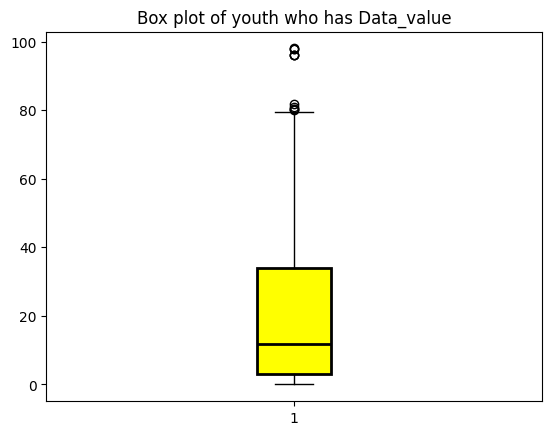

In [ ]:
  plt.boxplot(df["Data_Value"],patch_artist=True,boxprops=dict(facecolor="yellow",linewidth=2),
    medianprops=dict(color="black",linewidth=2))
plt.title("Box plot of youth who has Data_value")

**The boxplot visualization indicates a relatively low number of outliers. Therefore, winsorization may be an appropriate approach for mitigating their influence on subsequent analyses.**

In [ ]:
 df['Data_Value'] = winsorize(df['Data_Value'].values, limits=[0.01, 0.01])

{'whiskers': [<matplotlib.lines.Line2D at 0x78252956c8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x78252956ce20>,
 'boxes': [<matplotlib.patches.PathPatch at 0x78252956c520>],
 'medians': [<matplotlib.lines.Line2D at 0x78252956d360>],
 'fliers': [<matplotlib.lines.Line2D at 0x78252956d600>],
 'means': []}

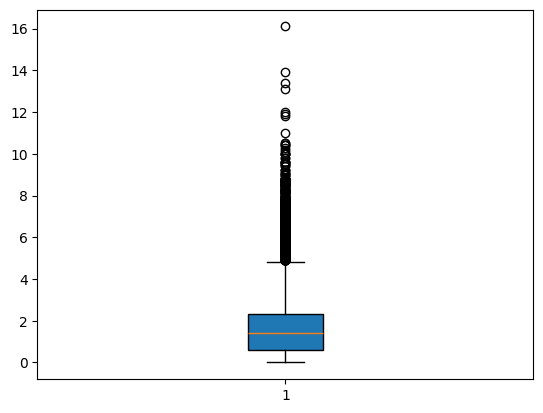

In [ ]:
plt.boxplot(df["Data_Value_Std_Err"],patch_artist=True)

**A significant number of outliers were observed in this column. Therefore, it may be necessary to consider removing this column from the analysis.**

Text(0.5, 1.0, 'Box plot of youth who has Low_Confidence_Limit ')

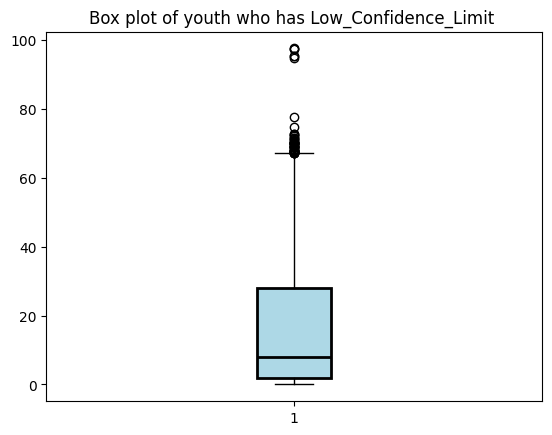

In [ ]:
 plt.boxplot(df["Low_Confidence_Limit"],patch_artist=True,boxprops=dict(facecolor="Lightblue",linewidth=2),
    medianprops=dict(color="black",linewidth=2))
plt.title("Box plot of youth who has Low_Confidence_Limit ")

**Given the relatively low number of outliers identified, we have chosen to employ winsorization as an outlier mitigation technique.**

In [ ]:
df['Low_Confidence_Limit'] = winsorize(df['Low_Confidence_Limit'].values, limits=[0.01, 0.01])

Text(0.5, 1.0, 'Box plot of youth who has High_Confidence_Limit ')

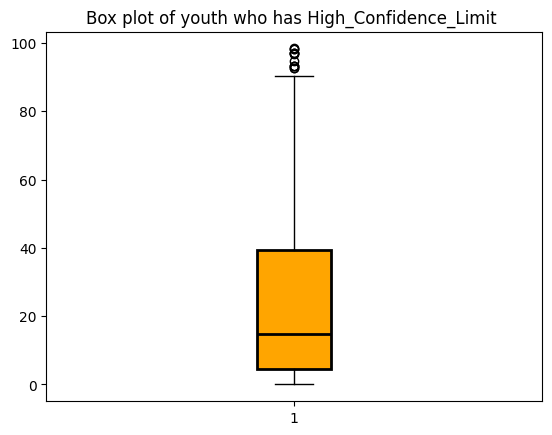

In [ ]:
plt.boxplot(df["High_Confidence_Limit"],patch_artist=True,boxprops=dict(facecolor="orange",linewidth=2),
    medianprops=dict(color="black",linewidth=2))
plt.title("Box plot of youth who has High_Confidence_Limit ")

**Given the relatively low number of outliers identified, we have chosen to employ winsorization as an outlier mitigation technique.**

In [ ]:
df['High_Confidence_Limit'] = winsorize(df['High_Confidence_Limit'].values, limits=[0.01, 0.01])

Text(0.5, 1.0, 'Box plot of youth who has sample size ')

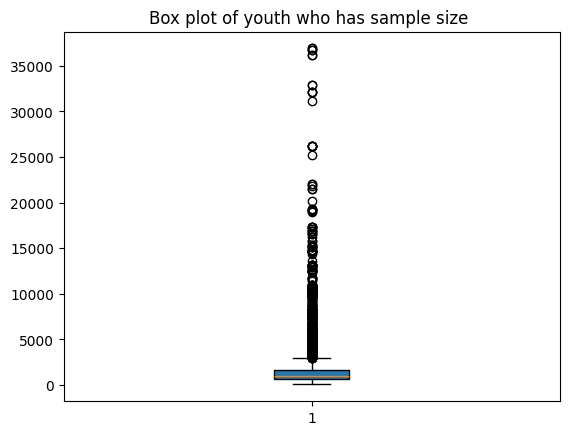

In [ ]:
plt.boxplot(df["Sample_Size"],patch_artist=True)
plt.title("Box plot of youth who has sample size ")

**A substantial number of outliers were identified within this dataset so its better to drop it.**

**As observed above, the columns Data_Value_Std_Err and Sample_Size contain a high number of outliers. Therefore, we will drop these columns.**

**Additionally, when comparing TopicID and TopicDesc:**

**"Cigarette Use (Youth)" corresponds to 106BEH.**
**"Smokeless Tobacco Use (Youth)" corresponds to 151BEH.**
**"Cessation (Youth)" corresponds to 105BEH.**
**Since we don't have any other table where TopicID could be used, and TopicDesc is already understandable, there's no benefit in retaining TopicID.**

**The same logic applies to MeasureDesc, MeasureID, and MeasureSubID. If we had another table referencing these IDs, we would keep them for future use. However, as no such tables exist, it's better to remove these columns as well.**

In [ ]:
df=df.drop(["Data_Value_Std_Err","Sample_Size","TopicId","MeasureId","SubMeasureID"],axis=1)

In [ ]:

df.loc[(df["MeasureDesc"] == "Percent of Current Smokers Who Want to Quit"), "Response"] = "Want to quit"
df.loc[(df["MeasureDesc"] == "Quit Attempt in Past Year Among Current Cigarette Smokers"), "Response"] = "tried to quit"


**Assuming that 'Youth Percent of Current Smokers Who Want to Quit' indicates a desire to quit and 'Quit Attempt in Past Year Among Current Cigarette Smokers' indicates a previous quit attempt, we filled the null values in the 'response' column accordingly.**

In [ ]:
df.isnull().sum()

,0
YEAR,0
LocationDesc,0
TopicDesc,0
MeasureDesc,0
Response,0
Data_Value,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
Gender,0
Education,0


In [ ]:
df.dropna(inplace=True)
df.shape

(10596, 14)

**As we see  there are null values only in geolocation so we are using dropna function and check the total number of rows and columns**

In [ ]:
pd.pivot_table(df,index=["StratificationID4","Education"],values=["High_Confidence_Limit","Low_Confidence_Limit"],aggfunc="mean")

,,High_Confidence_Limit,Low_Confidence_Limit
StratificationID4,Education,,
1EDU,Middle School,19.073003,11.686184
2EDU,High School,29.367021,21.344209


**Our analysis suggests that individuals who are the first in their family to receive formal education tend to have educational attainment limited to middle school. In contrast, those who are the second generation to receive education within their family typically achieve higher levels of education, often completing high school. Furthermore, individuals from the second generation with a high school education exhibit both higher high confidence limits and lower low confidence limits compared to first-generation individuals with a middle school education.**

High_Confidence_Limit mean and median difference is 9.19650234889476


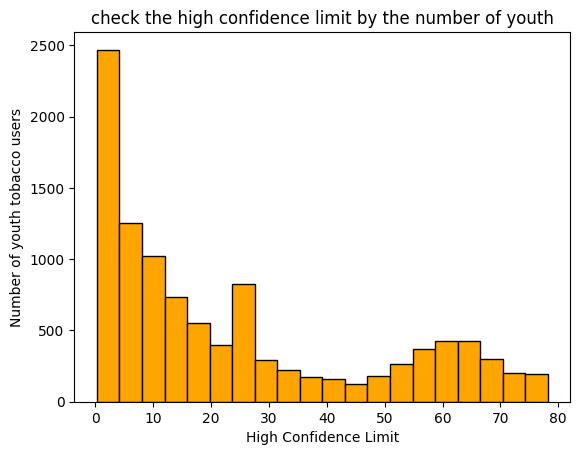

In [ ]:
High_Confidence_Limit_mean=df["High_Confidence_Limit"].mean()
High_Confidence_Limit_median=df["High_Confidence_Limit"].median()
value=High_Confidence_Limit_mean-High_Confidence_Limit_median
print("High_Confidence_Limit mean and median difference is",value)
plt.hist(df["High_Confidence_Limit"],bins=20, edgecolor='black', color='orange')
plt.title('check the high confidence limit by the number of youth')
plt.xlabel('High Confidence Limit')
plt.ylabel('Number of youth tobacco users')
plt.show()

**The observation that the difference between the high confidence limit mean and median is positive, coupled with the right-skewed nature of the high confidence limit's distribution, suggests a potential right-skewed distribution for the high confidence limit itself.**

Low_Confidence_Limit mean and median difference is 8.311674216685544


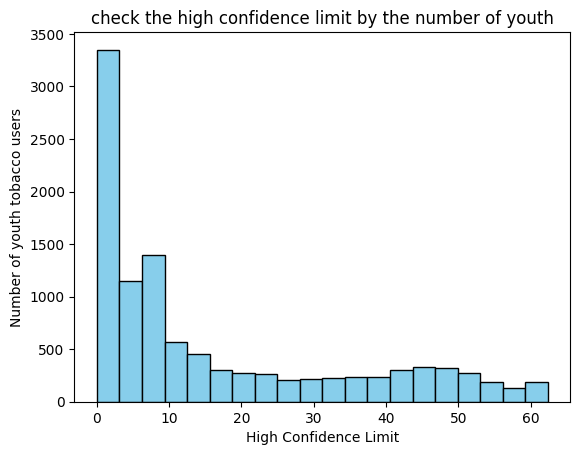

In [ ]:
Low_Confidence_Limit_mean=df["Low_Confidence_Limit"].mean()
Low_Confidence_Limit_median=df["Low_Confidence_Limit"].median()
value=Low_Confidence_Limit_mean-Low_Confidence_Limit_median
print("Low_Confidence_Limit mean and median difference is",value)
plt.hist(df["Low_Confidence_Limit"],bins=20, edgecolor='black', color='skyblue')
plt.title('check the high confidence limit by the number of youth')
plt.xlabel('High Confidence Limit')
plt.ylabel('Number of youth tobacco users')
plt.show()

**The observation that the difference between the Low confidence limit mean and median is positive, coupled with the right-skewed nature of the high confidence limit's distribution, suggests a potential right-skewed distribution for the Low confidence limit itself.**

([<matplotlib.patches.Wedge at 0x7825293bb790>,
 [Text(0.3804075088820762, 1.0321289295364864, 'Cigarette Use (Youth)'),
  Text(-0.9630499230335244, -0.5315400697455677, 'Smokeless Tobacco Use (Youth)'),
  Text(0.8317902101907093, -0.7198090345577054, 'Cessation (Youth)')],
 [Text(0.20749500484476882, 0.5629794161108107, '38.8%'),
  Text(-0.525299958018286, -0.28993094713394596, '38.5%'),
  Text(0.4537037510131141, -0.39262310975874837, '22.7%')])

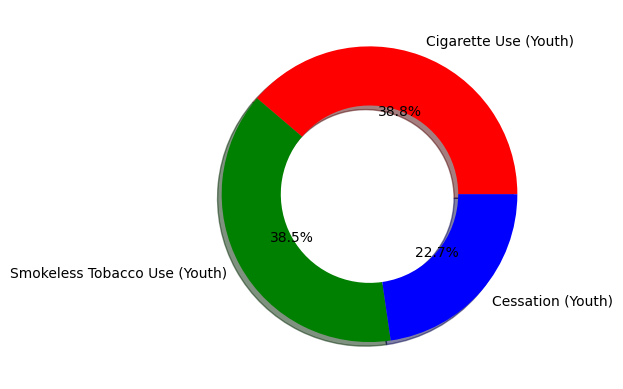

In [ ]:
topic_desc_count=df["TopicDesc"].value_counts()
plt.pie(topic_desc_count.values,labels=["Cigarette Use (Youth)","Smokeless Tobacco Use (Youth)","Cessation (Youth)"],colors=["red","green","blue"],autopct='%1.1f%%',shadow=True,wedgeprops={'width': 0.4})

**Calculating the prevalence rates of tobacco use among youth, including cigarettes, smokeless tobacco, and e-cigarettes.**

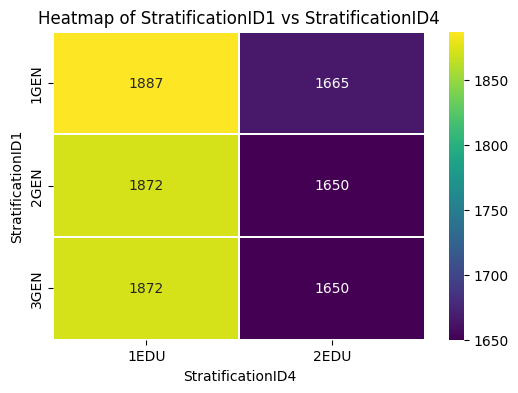

In [ ]:
table = pd.crosstab(df['StratificationID1'], df['StratificationID4'])
plt.figure(figsize=(6, 4))
sns.heatmap(table, cbar=True,annot= True, cmap='viridis', fmt='d', linewidths=.10)
plt.title("Heatmap of StratificationID1 vs StratificationID4")
plt.show()


Correlation between  High_Confidence_Limit and Low_Confidence_Limit: 0.9738804476146251


Text(0.5, 1.0, 'Scatter plot of High_Confidence_Limit and Low_Confidence_Limit')

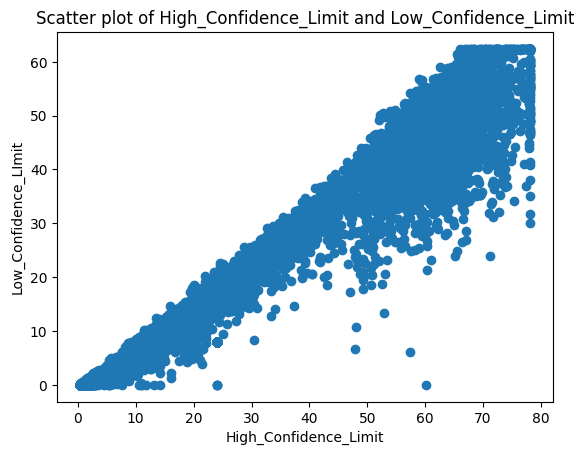

In [ ]:
correlation = df['High_Confidence_Limit'].corr(df['Low_Confidence_Limit'])
print(f"Correlation between  High_Confidence_Limit and Low_Confidence_Limit: {correlation}")

plt.scatter(df["High_Confidence_Limit"],df["Low_Confidence_Limit"])
plt.xlabel("High_Confidence_Limit")
plt.ylabel("Low_Confidence_LImit")
plt.title("Scatter plot of High_Confidence_Limit and Low_Confidence_Limit")

**An analysis reveals a strong positive correlation between the high and low confidence limits for youth tobacco users, with a correlation coefficient exceeding 0.9. This indicates that as the high confidence limit increases, the low confidence limit also tends to increase.**

Gender
Overall    3552
Female     3522
Male       3522
Name: count, dtype: int64


Text(0, 0.5, 'Number of Tobacco users')

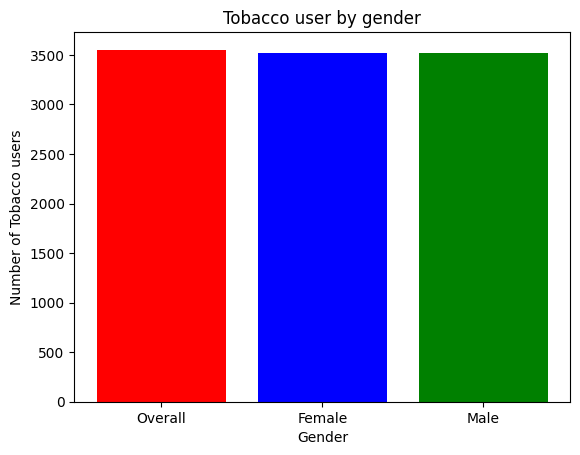

In [ ]:
gender_count=df["Gender"].value_counts()
print(gender_count)
plt.bar(gender_count.index,gender_count.values,color=["red","blue","green"])
plt.title("Tobacco user by gender")
plt.xlabel("Gender")
plt.ylabel("Number of Tobacco users")

**The gender distribution among tobacco users is relatively balanced, with a minimal difference between the number of male and female users.**

<BarContainer object of 50 artists>

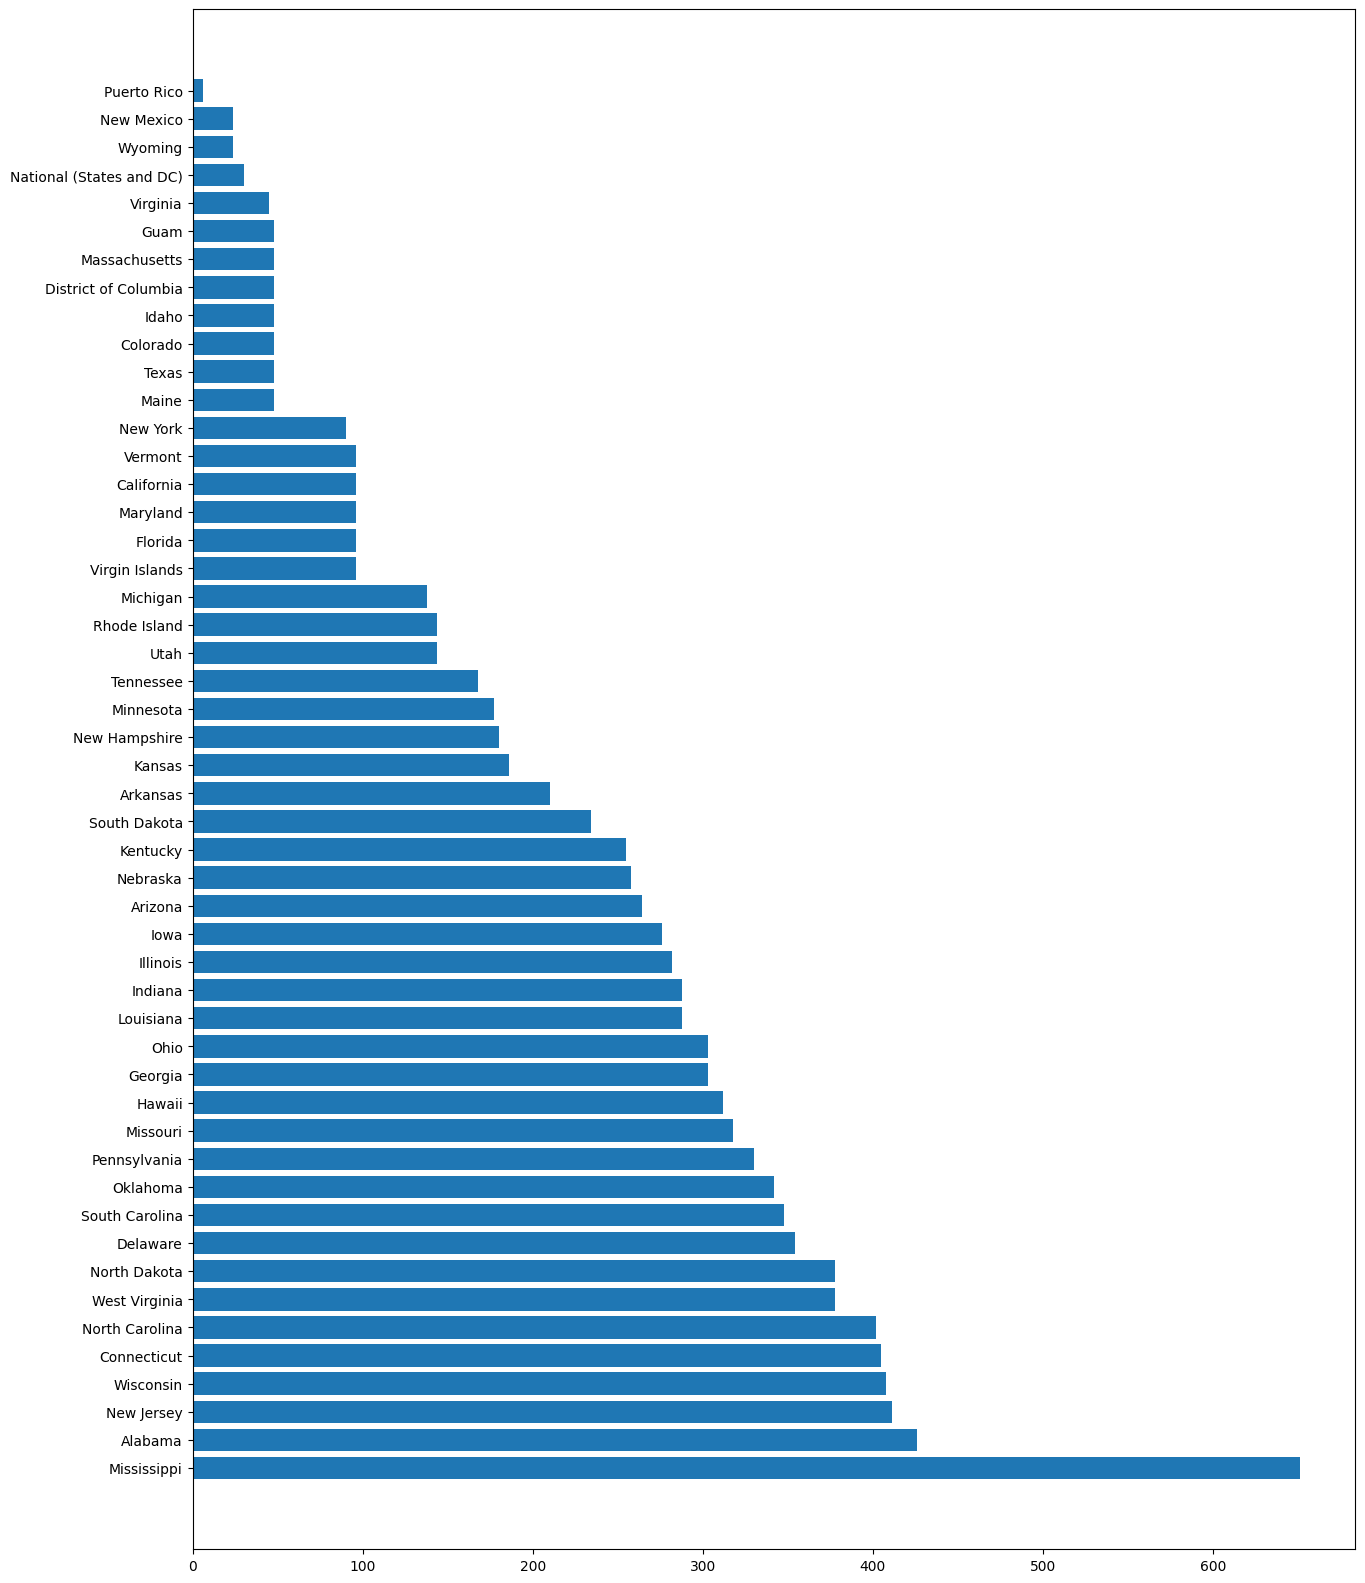

In [ ]:
location_count=df["LocationDesc"].value_counts()
plt.figure(figsize=[15,20])
plt.barh(location_count.index,location_count.values)

**Tobacco use prevalence varies significantly by location.**

([<matplotlib.patches.Wedge at 0x782530ee1150>,
 [Text(0.7589152544443774, 0.7962710823404464, 'Ever'),
  Text(-0.8317902775840911, 0.7198089566798825, 'Frequent'),
  Text(-0.6790423893631387, -0.8653909136615658, 'Current'),
  Text(0.550564633950878, -0.9523017294127613, 'Want to quit'),
  Text(1.0394814510917685, -0.35983095035884743, 'tried to quit')],
 [Text(0.4139537751514785, 0.4343296812766071, '25.8%'),
  Text(-0.4537037877731405, 0.3926230672799359, '25.8%'),
  Text(-0.3703867578344392, -0.47203140745176314, '25.8%'),
  Text(0.3003079821550243, -0.5194373069524152, '12.1%'),
  Text(0.5669898824136919, -0.19627142746846224, '10.6%')])

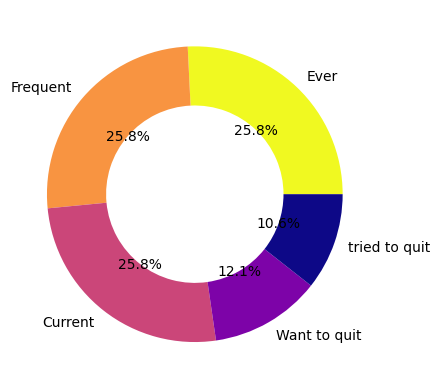

In [ ]:
response_count=df["Response"].value_counts()
import numpy as np
colors = plt.cm.plasma_r(np.linspace(0, 1, len(response_count.values)))
plt.pie(response_count.values,labels=["Ever","Frequent","Current","Want to quit","tried to quit"],colors=colors,autopct='%1.1f%%',wedgeprops={'width': 0.4})

**The responses of youth tobacco users during the surve.**

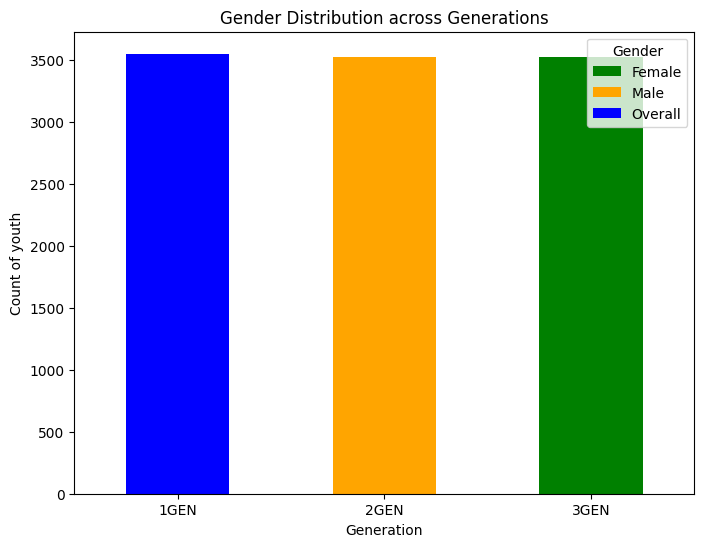

In [ ]:
gender_counts = df.groupby(['StratificationID1', 'Gender']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, color=['green', 'orange', 'blue'], figsize=(8, 6))
plt.xticks(rotation=0)
plt.title('Gender Distribution across Generations')
plt.xlabel('Generation')
plt.ylabel('Count of youth')
plt.legend(title='Gender')

**Our analysis indicates that within the youth tobacco user population, individuals from the first generation exhibit the highest overall prevalence. However, within the second generation, tobacco use appears to be exclusive to males, while in the third generation, it is observed only among females.**

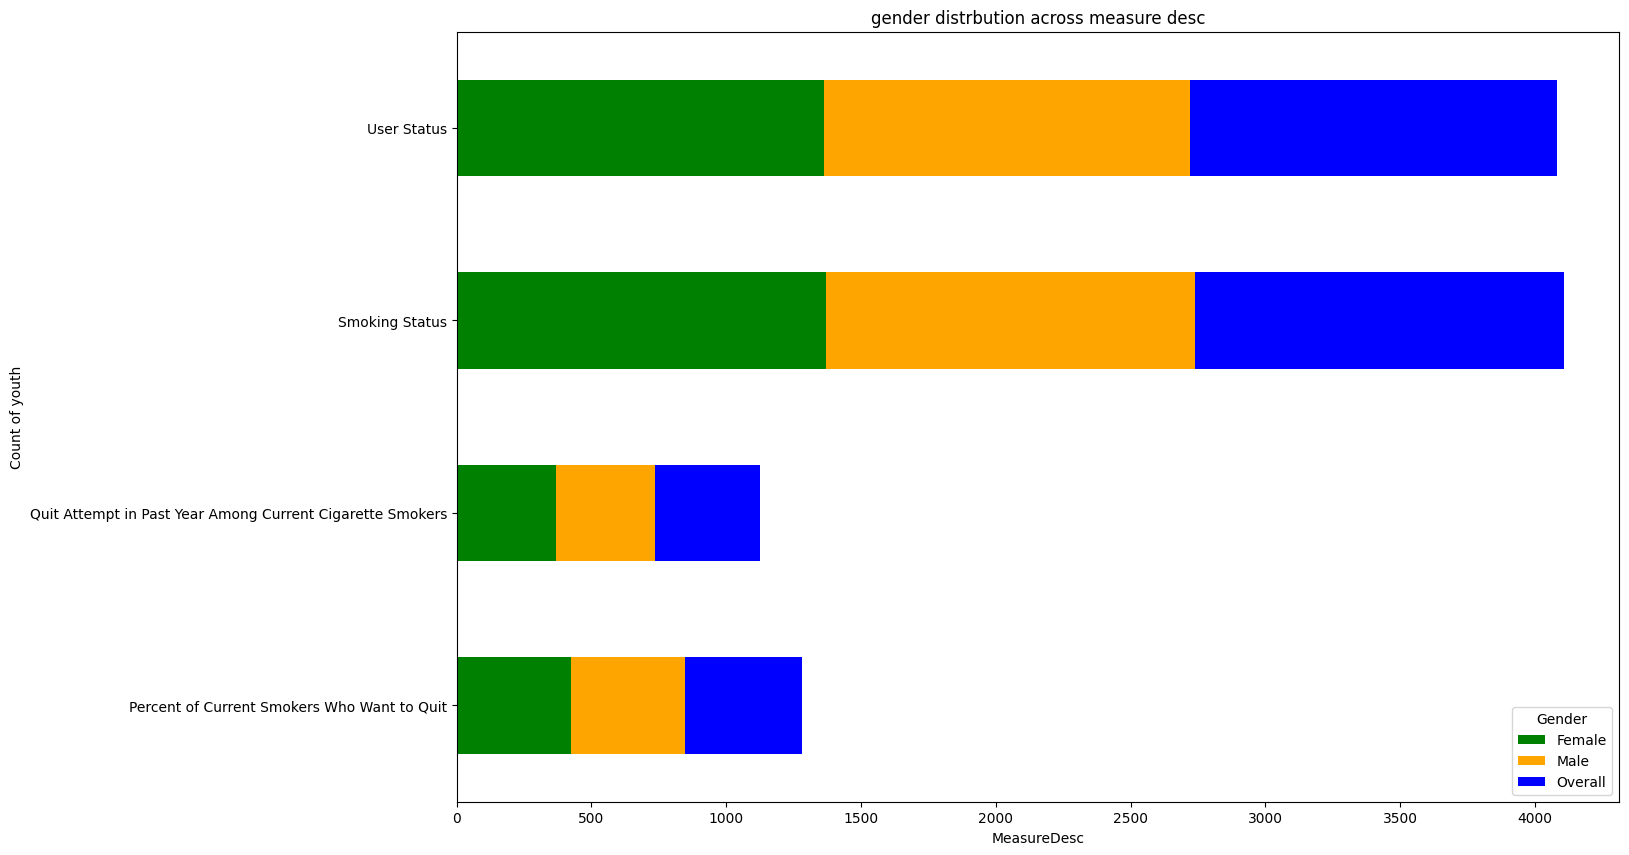

In [ ]:
MeasureDesc_counts = df.groupby(['MeasureDesc', 'Gender']).size().unstack(fill_value=0)
MeasureDesc_counts.plot(kind='barh', stacked=True, color=['green', 'orange', 'blue'], figsize=(15, 10))
plt.xticks(rotation=0)
plt.title('gender distrbution across measure desc')
plt.xlabel('MeasureDesc')
plt.ylabel('Count of youth')
plt.legend(title='Gender')